<img src="http://vernonfernandes.net/assets/New Project.png" width="100%">

# Introduction

This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.

For the purpose of our analysis, we will start with merging the necessary files as there are separate tables that contain information on different aspects of the transactions. Most of these files would be essential to our analysis apart from a few which tend to cater more towards the logistics and supply chain departments.

The structure of the data schema as provided by Olist can be seen below.

<img src="https://i.imgur.com/HRhd2Y0.png" width="100%">

# Importing Libraries

In [2]:
#Importing all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

# Business Value

The idea behind any analysis should be to provide value to the organization. Below, I will read the all the datasets and then merge the data. After that I will start the exploratory data analysis in order to understand the situation better and get a bigger solution.

The initial stages of our analysis are fairly straightforward and can be accomplished with the help of Python's several packages that make indexing, aggregation and visualization a simple task. The modelling stage will require some domain knowledge and we will decide what use case we will pick and try to solve.

With the recent happenings around the world organizations are moving online faster than ever. Having an online presence not only gives your customer the convenience of being able to access your store from anywhere in the world, it gives your organization an edge with the amount of data that is being collected on a day to day basis. This allows for a highly targeted and customized approach to your marketing efforts, making sure that no penny is wasted.


# 1. Olist Orders Dataset

The **olist_orders_dataset** dataset contains the order details of all the customer purchases made. 
 
Tasks:

1. Frequency of purchases per customer.
2. Time series analysis of orders. Use of DateTime library in python to separate date and time from the necessary columns. 
3. Find out the most popular months, days and times of the day.

In [3]:
olist_orders_dataset = pd.read_csv('olist_orders_dataset.csv')
olist_orders_dataset.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


# 2. Olist Sellers Dataset

The **olist_sellers_dataset** dataset contains the seller location. 
 
Tasks:

1. Find out the most popular cities that vendors came from.

In [5]:
olist_sellers_dataset = pd.read_csv('olist_sellers_dataset.csv')
olist_sellers_dataset.head(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


# 3. Olist Customers Dataset

The **olist_customers_dataset** dataset contains the geographical details of the Olist customers. 
 
Tasks:

1. Locations where most of your customers are present.

In [6]:
olist_customers_dataset = pd.read_csv('olist_customers_dataset.csv')
olist_customers_dataset.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


# 4. Olist Products Dataset

The **olist_products_dataset** dataset gives us the list of all products present on the Olist site. 
 
Tasks:

1. Grouping by product category to find out the most popular categories by vendors.
2. Find the top 10 categories with maximum number of products.

In [7]:
olist_products_dataset = pd.read_csv('olist_products_dataset.csv')
olist_products_dataset.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


# 5. Olist Payments Dataset

The **olist_payments_dataset** dataset contains the payment information of all orders
 
Tasks:

1. Which is the prefered method of payment.
2. How many installments do customers usually choose to pay in.
3. Is there a correlation between the installments and payment value.
4. Aggregation functions on the payment value column.

In [8]:
olist_order_payments_dataset = pd.read_csv('olist_order_payments_dataset.csv')
olist_order_payments_dataset.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


# 6. Olist Geolocation Dataset

The **olist_geolocation_dataset** dataset contains the physical location where purchases were made.
 
Tasks:

1. Plot the map data usling plotly.

In [9]:
olist_geolocation_dataset = pd.read_csv('olist_geolocation_dataset.csv')
olist_geolocation_dataset.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


# 7. Olist Order Reviews Dataset

The **olist_order_reviews_dataset** dataset contains review data of the orders made.
 
Tasks:

1. For now only review score can be used but NLP can be used in further use cases.

In [10]:
olist_order_reviews_dataset = pd.read_csv('olist_order_reviews_dataset.csv')
olist_order_reviews_dataset.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


# 8. Olist Order Items Dataset

The **olist_order_items_dataset** dataset maps the order data to the product data and seller, it also gives us the freight value and price of the product in a specific order.
 
Tasks:

1. Grouping by order_id to find out trends by price and freight value.
2. Analyzing seller data. Which sellers were better at selling which products. 
3. Is there a correlation between seller and price of products sold.

In [11]:
olist_order_items_dataset = pd.read_csv('olist_order_items_dataset.csv')
olist_order_items_dataset.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


# 9. Product Category Name Translation

The **product_category_name_translation** dataset contains translation of product category.

In [12]:
product_category_name_translation = pd.read_csv('product_category_name_translation.csv')
product_category_name_translation.head(10)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


<img src="http://vernonfernandes.net/assets/1.png" width="100%">

Before any analysis begins, we need to merge the available CSV files. This can be a tricky part of our pipeline as mistakes can multiply down the road. 

In [23]:
# Merge the datasets
df = olist_orders_dataset.merge(olist_order_reviews_dataset, on='order_id', how='left')
df = df.merge(olist_order_payments_dataset, on='order_id', how='left')
df_1 = olist_order_items_dataset.merge(olist_sellers_dataset, on='seller_id', how='left')
df_1 = df_1.merge(olist_products_dataset, on='product_id', how='left')
df = df.merge(df_1, on='order_id', how='left')
df = df.merge(olist_customers_dataset, on='customer_id', how='left')

In the above cell, we have merged the following dataset together to create a final dataset.

1. olist_orders_dataset
2. olist_order_reviews_dataset
3. olist_order_payments_dataset
4. olist_order_items_dataset
5. olist_sellers_dataset
6. olist_products_dataset
7. olist_customers_dataset

As you can see, the dataset contains a lot of missing information, most of it however does not provide too much value to our Marketing specific analysis. 

In [24]:
# Print the dataset
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,...,178.0,1.0,400.0,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,...,232.0,1.0,420.0,24.0,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119151 entries, 0 to 119150
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    119151 non-null  object 
 1   customer_id                 119151 non-null  object 
 2   order_status                119151 non-null  object 
 3   order_purchase_timestamp    119151 non-null  object 
 4   review_id                   119151 non-null  object 
 5   review_score                119151 non-null  int64  
 6   payment_sequential          119148 non-null  float64
 7   payment_type                119148 non-null  object 
 8   payment_installments        119148 non-null  float64
 9   payment_value               119148 non-null  float64
 10  order_item_id               118318 non-null  float64
 11  product_id                  118318 non-null  object 
 12  seller_id                   118318 non-null  object 
 13  price         

In [25]:
df.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
review_id                             0
review_score                          0
review_comment_title             104962
review_comment_message            67901
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
seller_zip_code_prefix              833


In [26]:
df.drop(['review_comment_title','review_comment_message', 'review_creation_date','review_answer_timestamp', 'shipping_limit_date', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_approved_at'], axis=1, inplace = True)

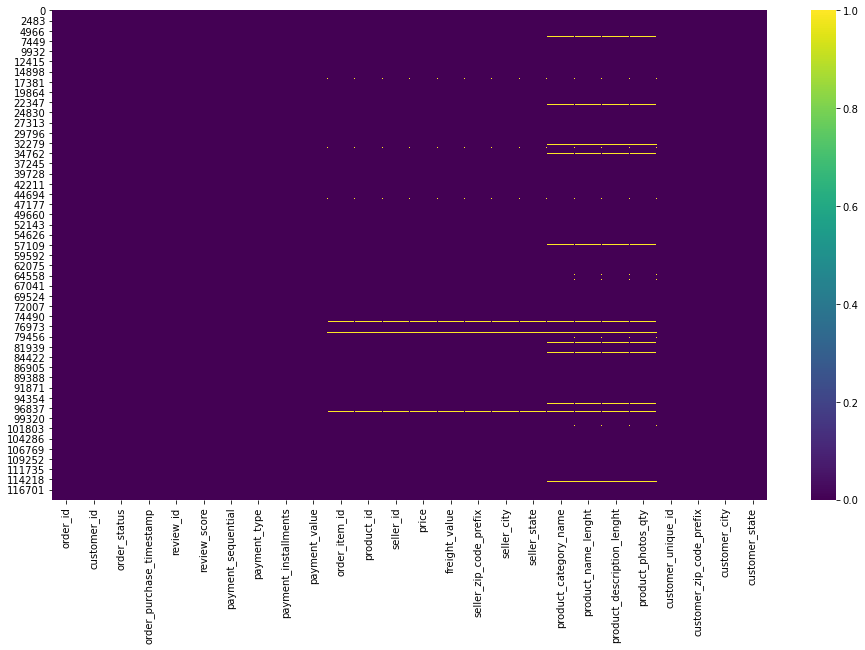

In [27]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isna(), cmap="viridis")

In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,a54f0611adc9ed256b57ede6b6eb5114,4,1.0,credit_card,1.0,18.12,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,a54f0611adc9ed256b57ede6b6eb5114,4,3.0,voucher,1.0,2.00,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,a54f0611adc9ed256b57ede6b6eb5114,4,2.0,voucher,1.0,18.59,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,8d5266042046a06655c8db133d120ba5,4,1.0,boleto,1.0,141.46,...,belo horizonte,SP,perfumaria,29.0,178.0,1.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,e73b67b67587f7644d5bd1a52deb1b01,5,1.0,credit_card,3.0,179.12,...,guariba,SP,automotivo,46.0,232.0,1.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [30]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'review_id', 'review_score', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'price', 'freight_value', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [31]:
df.price

0          29.99
1          29.99
2          29.99
3         118.70
4         159.90
           ...  
119146    174.90
119147    205.99
119148    179.99
119149    179.99
119150     68.50
Name: price, Length: 119151, dtype: float64

<img src="http://vernonfernandes.net/assets/3.png" width="100%">

In [33]:
# Exploring orders dataset
olist_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Tasks:

1. Frequency of purchases per customer.
2. Time series analysis of orders. Use of DateTime library in python to separate date and time from the necessary columns.
3. Find out the most popular months, days and times of the day.

In [35]:
olist_orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Only three columns have null values namely, order_approved_at, order_delivered_carrier_date and order_delivered_customer_date.                

In [36]:
olist_orders_dataset.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,73fc7af87114b39712e6da79b0a377eb,112bade7b7b461df9734fb6fa2ec6b2e,delivered,2017-11-20 10:59:08,2018-02-27 04:31:10,2018-05-09 15:48:00,2017-06-19 18:47:51,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [34]:
olist_orders_dataset.customer_id.nunique()

99441

In [50]:
olist_orders_dataset.groupby("order_status")["order_id"].count().sort_values(ascending=False)#.plot(kind="bar")

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

We can see that more than 96k products were successfully delivered.

In [52]:
olist_orders_dataset["order_purchase_timestamp"] = pd.to_datetime(olist_orders_dataset["order_purchase_timestamp"])

In [54]:
olist_orders_dataset["order_purchase_timestamp"].dt.month

0        10
1         7
2         8
3        11
4         2
         ..
99436     3
99437     2
99438     8
99439     1
99440     3
Name: order_purchase_timestamp, Length: 99441, dtype: int64

In [55]:
olist_orders_dataset["purchase_month"] = olist_orders_dataset["order_purchase_timestamp"].dt.month
olist_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,7
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2


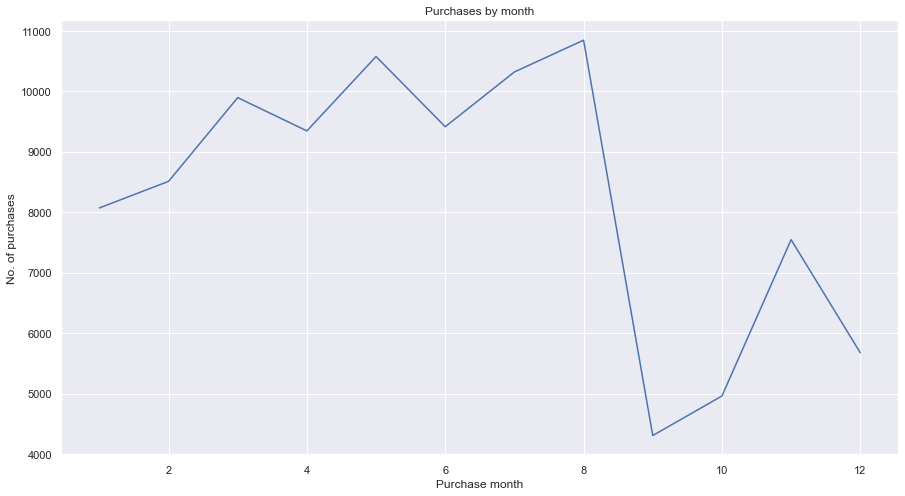

In [70]:
# Plot the purchases by month
sns.set()
purchase_freq = olist_orders_dataset.groupby("purchase_month")["order_id"].count()
plt.figure(figsize=(15,8))
purchase_freq.plot()
plt.xlabel("Purchase month")
plt.ylabel("No. of purchases")
plt.title("Purchases by month")
plt.show()

Hence, we can see a clear seasonality in the orders made by the customers on the basis of months.
The purchases keeps on increasing from January to August and then it falls drastically then it again increases in the month of November.

In [73]:
# Create year
olist_orders_dataset["purchase_year"] = olist_orders_dataset["order_purchase_timestamp"].dt.year
olist_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,purchase_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,10,2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,7,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,8,2018
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,11,2017
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2,2018


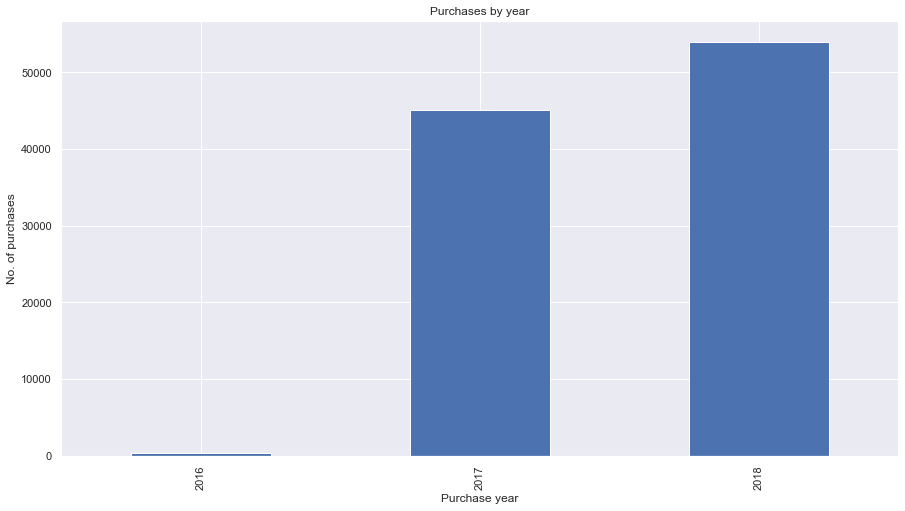

In [77]:
purchase_freq_year = olist_orders_dataset.groupby(["purchase_year"])["order_id"].count()
plt.figure(figsize=(15,8))
purchase_freq_year.plot(kind="bar")
plt.xlabel("Purchase year")
plt.ylabel("No. of purchases")
plt.title("Purchases by year")
plt.show()

The aggregate number of orders have increased over years.

In [81]:
olist_orders_dataset["order_estimated_delivery_date"] = pd.to_datetime(olist_orders_dataset["order_estimated_delivery_date"]) 
olist_orders_dataset["order_delivered_customer_date"] = pd.to_datetime(olist_orders_dataset["order_delivered_customer_date"])

In [83]:
timst = olist_orders_dataset["order_estimated_delivery_date"]-olist_orders_dataset["order_delivered_customer_date"]
timst.mean()

Timedelta('11 days 04:17:55.957616401')

On average, the order is delivered before 11 days of estimated delivery date.

In [98]:
ssd = olist_orders_dataset.groupby(["purchase_month"])["order_status"].value_counts()

In [116]:
olist_orders_dataset.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [134]:
cancel_order = olist_orders_dataset[olist_orders_dataset["order_status"] == "canceled"]
#cancel_order.order_purchase_timestamp.plot(marker="*", linestyle=None)


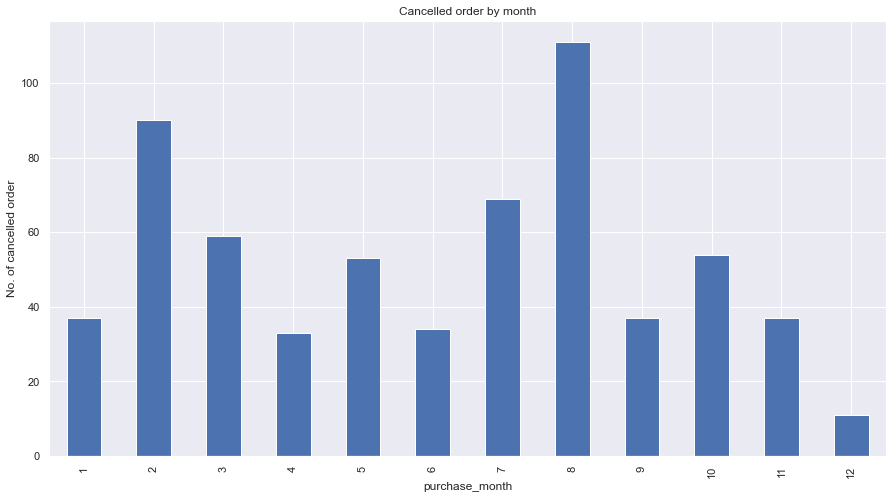

In [137]:
plt.figure(figsize=(15,8))

ddf = cancel_order.groupby("purchase_month")["order_id"].count()
plt.xlabel("Purchase month")
plt.ylabel("No. of cancelled order")
plt.title("Cancelled order by month")
ddf.plot(kind="bar")
plt.show()

It can be observed that in the month of Feburary and August, the number of cancelled order increases. We need to find out the reason behind that.